#  Import packages & read data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("Bank_loan.csv")
df = data.copy()
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,2,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,3,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,4,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,5,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [4]:
df.shape

(100000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  int64  
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [6]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [7]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,2,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,3,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,4,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,5,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


# Data Preprocessing

Cleaning the data

In [8]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 19 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan ID,100000.0,5.000050e+04,2.886766e+04,1.0,25000.7500,50000.5,7.500025e+04,1.000000e+05
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07


In [11]:
df["Months since last delinquent"].describe()

count    46859.000000
mean        34.901321
std         21.997829
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [12]:
# drop variable because there are lots of missing value
# Drop the columns with > 50% missing

df = df.drop("Months since last delinquent", axis = 1)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [13]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


<AxesSubplot: xlabel='Credit Score', ylabel='Density'>

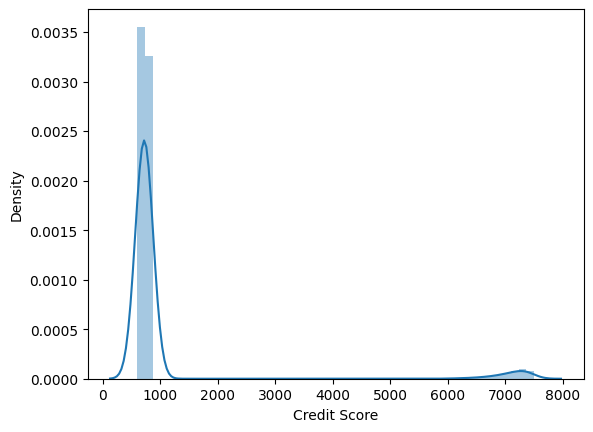

In [14]:
sns.distplot(df['Credit Score'])

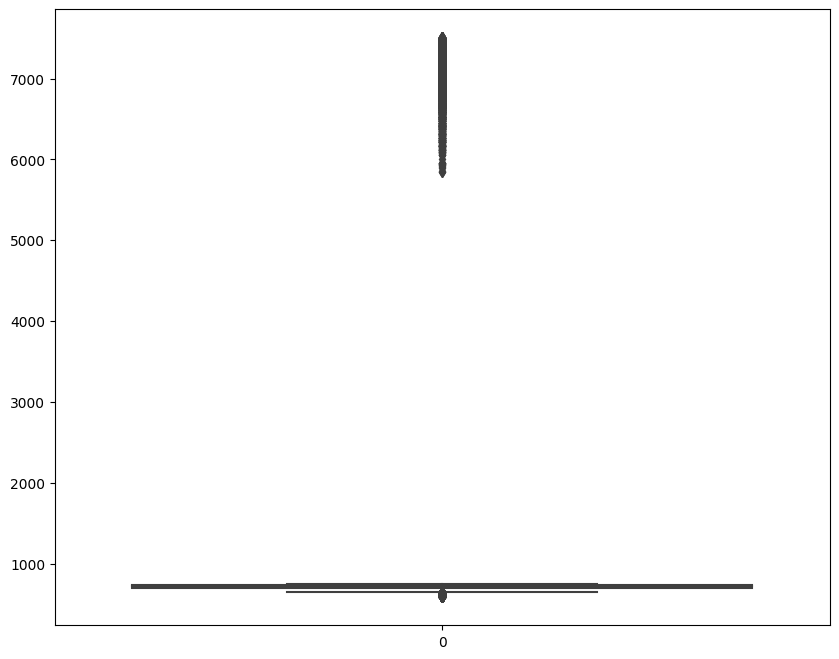

In [15]:
plt.figure(figsize = (10,8))
sns.boxplot(df["Credit Score"]);

In [16]:
df[df["Credit Score"] > 5000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,6,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0
43,44,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,4,0,132468,164406.0,0.0,0.0
51,52,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,9,0,254277,379918.0,0.0,0.0
56,57,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,8,0,104633,199936.0,0.0,0.0
65,66,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,5,0,474658,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,99852,039ee8d2-3321-4683-9592-cb1a360c34e2,Charged Off,198572,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,8,0,296704,433224.0,0.0,0.0
99872,99873,3e108ac9-9b7c-44a9-9289-e389cf3085b1,Charged Off,110924,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,9,0,60154,96470.0,0.0,0.0
99906,99907,4cfda7f6-790e-4493-a9b1-4d35a8b63af9,Charged Off,175362,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,13,0,277153,333234.0,0.0,0.0
99944,99945,070e3aa9-d077-404c-8946-59ce976e0b70,Charged Off,88968,Short Term,6790.0,441845.0,< 1 year,Rent,other,5375.86,8.5,10,0,193306,535458.0,0.0,0.0


In [17]:
df["Credit Score"].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

The mean is typically better when the data follow a symmetric distribution. When the data are skewed, the median is more useful because the mean will be distorted by outliers.

In [18]:
df["Credit Score"] = df["Credit Score"].fillna(df["Credit Score"].median())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  int64  
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  int64  
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  int64  
 13  Number of Credit Problems  100

In [20]:
outliers = (df['Credit Score'] - df['Credit Score'].mean()).abs() > 3 * df['Credit Score'].std()

# Calculate the median of the column
median = df['Credit Score'].median()

# Replace outliers with the median value
df.loc[outliers, 'Credit Score'] = median

In [21]:
df[df["Credit Score"] > 5000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  int64  
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  int64  
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  int64  
 13  Number of Credit Problems  100

In [23]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [24]:
df["Annual Income"].describe()

count    8.084600e+04
mean     1.378277e+06
std      1.081360e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174162e+06
75%      1.650663e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [25]:
df["Annual Income"].describe().apply(lambda x:  ("%.1f" % x))

count        80846.0
mean       1378276.6
std        1081360.2
min          76627.0
25%         848844.0
50%        1174162.0
75%        1650663.0
max      165557393.0
Name: Annual Income, dtype: object

In [26]:
df[df["Annual Income"] > 100000000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
85662,85663,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,176132,Short Term,724.0,165557393.0,10+ years,Home Mortgage,Debt Consolidation,15176.06,16.0,11,0,312778,669438.0,0.0,0.0


In [27]:
# clean outliers
df = df[ ~ (df["Annual Income"] > 100000000)]
df["Annual Income"].describe().apply(lambda x:  ("%.1f" % x))

count       80845.0
mean      1376245.8
std        914293.7
min         76627.0
25%        848844.0
50%       1174143.0
75%       1650663.0
max      36475440.0
Name: Annual Income, dtype: object

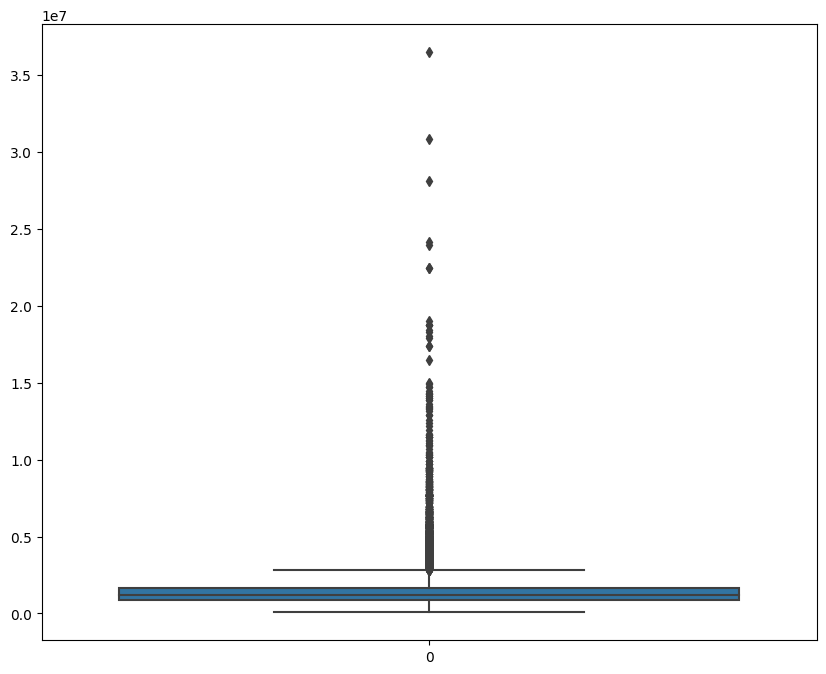

In [28]:
plt.figure(figsize = (10,8))
sns.boxplot(df["Annual Income"]);

In [29]:
df["Annual Income"]

0        1167493.0
1              NaN
2        2231892.0
3         806949.0
4              NaN
           ...    
99995     475437.0
99996    1289416.0
99997    1150545.0
99998    1717524.0
99999     935180.0
Name: Annual Income, Length: 99999, dtype: float64

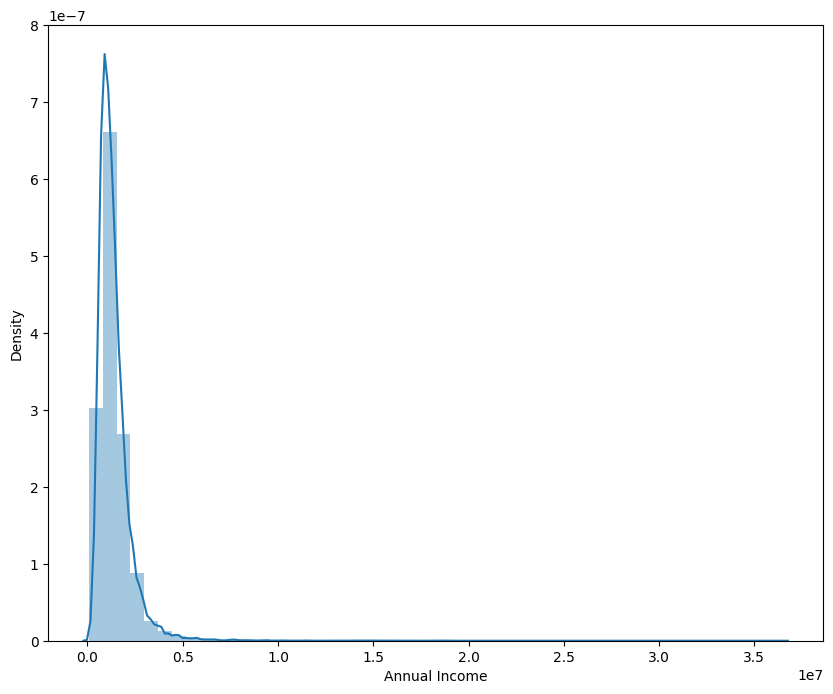

In [30]:
plt.figure(figsize = (10,8))
sns.distplot(df["Annual Income"]);

In [31]:
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

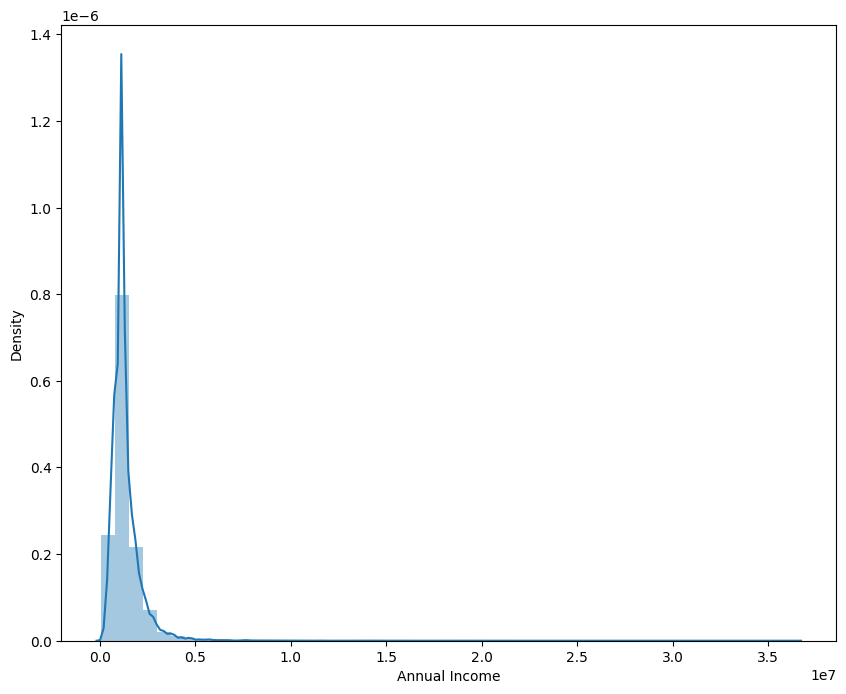

In [32]:
plt.figure(figsize = (10,8))
sns.distplot(df["Annual Income"]);

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    99999 non-null  int64  
 1   Customer ID                99999 non-null  object 
 2   Loan Status                99999 non-null  object 
 3   Current Loan Amount        99999 non-null  int64  
 4   Term                       99999 non-null  object 
 5   Credit Score               99999 non-null  float64
 6   Annual Income              99999 non-null  float64
 7   Years in current job       95777 non-null  object 
 8   Home Ownership             99999 non-null  object 
 9   Purpose                    99999 non-null  object 
 10  Monthly Debt               99999 non-null  float64
 11  Years of Credit History    99999 non-null  float64
 12  Number of Open Accounts    99999 non-null  int64  
 13  Number of Credit Problems  99999 non-null  int

In [34]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [35]:
df2 = df.copy()
df2.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,724.0,1174143.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,724.0,1174143.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [36]:
df["Years in current job"].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [37]:
# convert to float values

df["Years in current job"] = df["Years in current job"].str.extract('(\d+)').astype(float)
df["Years in current job"]

0         8.0
1        10.0
2         8.0
3         3.0
4         5.0
         ... 
99995     7.0
99996     1.0
99997     6.0
99998     9.0
99999     NaN
Name: Years in current job, Length: 99999, dtype: float64

In [38]:
df["Years in current job"].describe()

count    95777.000000
mean         5.977552
std          3.501103
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: Years in current job, dtype: float64

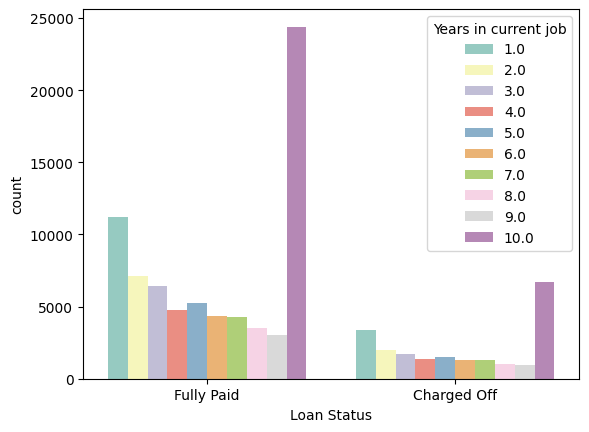

In [39]:
ax = sns.countplot(x="Loan Status", data=df,hue="Years in current job",palette="Set3")

<AxesSubplot: xlabel='Years in current job', ylabel='count'>

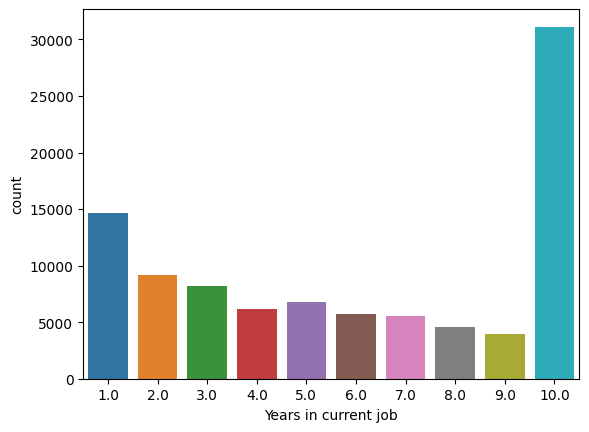

In [40]:
sns.countplot(x= 'Years in current job',data =df)

I will use 0 to fill the missing values.

In [41]:
df["Years in current job"] = df["Years in current job"].fillna(0)
df["Years in current job"]

0         8.0
1        10.0
2         8.0
3         3.0
4         5.0
         ... 
99995     7.0
99996     1.0
99997     6.0
99998     9.0
99999     0.0
Name: Years in current job, Length: 99999, dtype: float64

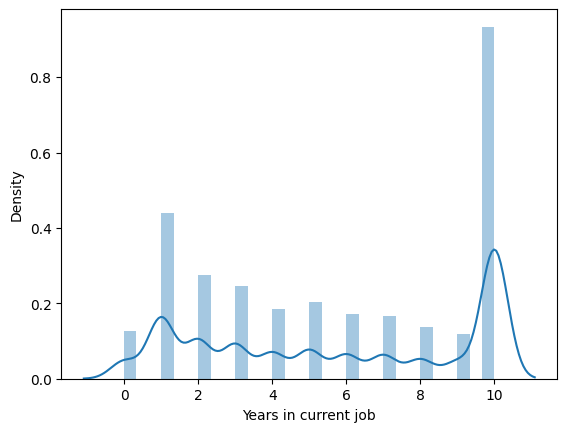

In [42]:
sns.distplot(df["Years in current job"]);

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    99999 non-null  int64  
 1   Customer ID                99999 non-null  object 
 2   Loan Status                99999 non-null  object 
 3   Current Loan Amount        99999 non-null  int64  
 4   Term                       99999 non-null  object 
 5   Credit Score               99999 non-null  float64
 6   Annual Income              99999 non-null  float64
 7   Years in current job       99999 non-null  float64
 8   Home Ownership             99999 non-null  object 
 9   Purpose                    99999 non-null  object 
 10  Monthly Debt               99999 non-null  float64
 11  Years of Credit History    99999 non-null  float64
 12  Number of Open Accounts    99999 non-null  int64  
 13  Number of Credit Problems  99999 non-null  int

In [44]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [45]:
df.dropna(subset = ["Maximum Open Credit","Bankruptcies","Tax Liens"], inplace = True)

In [46]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99793 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    99793 non-null  int64  
 1   Customer ID                99793 non-null  object 
 2   Loan Status                99793 non-null  object 
 3   Current Loan Amount        99793 non-null  int64  
 4   Term                       99793 non-null  object 
 5   Credit Score               99793 non-null  float64
 6   Annual Income              99793 non-null  float64
 7   Years in current job       99793 non-null  float64
 8   Home Ownership             99793 non-null  object 
 9   Purpose                    99793 non-null  object 
 10  Monthly Debt               99793 non-null  float64
 11  Years of Credit History    99793 non-null  float64
 12  Number of Open Accounts    99793 non-null  int64  
 13  Number of Credit Problems  99793 non-null  int

In [48]:
df.drop(["Customer ID"], axis = 1, inplace = True)
df.head()

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,Fully Paid,262328,Short Term,724.0,1174143.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,Fully Paid,176220,Short Term,724.0,1174143.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


# Resolving imbalance problem

In [49]:
from sklearn.utils import resample

Fully Paid     77207
Charged Off    22586
Name: Loan Status, dtype: int64


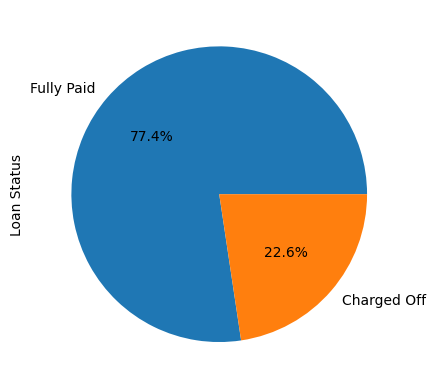

In [50]:
df['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df['Loan Status'].value_counts())

In [51]:
df["Loan Status"].value_counts()

Fully Paid     77207
Charged Off    22586
Name: Loan Status, dtype: int64

In [52]:
df_majority = df[df["Loan Status"] == "Fully Paid"]
df_minority = df[df["Loan Status"] == "Charged Off"]

In [53]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=77207,    # to match majority class
                                 random_state=123) # reproducible results

In [54]:
df_minority_upsampled

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
88478,88479,Charged Off,99748,Short Term,676.0,426113.0,0.0,Rent,Other,2570.89,28.5,6,0,81928,353958.0,0.0,0.0
70013,70014,Charged Off,277860,Short Term,724.0,1127498.0,8.0,Rent,Debt Consolidation,22643.82,11.2,12,1,214833,346456.0,0.0,1.0
78865,78866,Charged Off,746482,Long Term,701.0,1401706.0,10.0,Rent,Debt Consolidation,26632.30,23.4,15,0,645430,1237324.0,0.0,0.0
95594,95595,Charged Off,248468,Short Term,724.0,634429.0,10.0,Rent,Debt Consolidation,9728.00,11.6,11,0,376295,453860.0,0.0,0.0
68428,68429,Charged Off,781396,Short Term,724.0,1174143.0,10.0,Home Mortgage,Business Loan,36674.37,23.4,13,0,670719,836880.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21843,21844,Charged Off,326480,Short Term,733.0,1691703.0,6.0,Rent,Debt Consolidation,12955.72,13.5,7,2,123728,406978.0,2.0,0.0
85695,85696,Charged Off,257532,Short Term,740.0,1056476.0,10.0,Rent,Debt Consolidation,12237.33,15.3,5,0,153387,315480.0,0.0,0.0
56945,56946,Charged Off,336314,Long Term,724.0,1174143.0,1.0,Rent,Debt Consolidation,5467.63,10.0,16,0,205694,401632.0,0.0,0.0
51482,51483,Charged Off,264396,Long Term,713.0,1560337.0,10.0,Home Mortgage,Debt Consolidation,29776.42,18.6,17,0,366947,643764.0,0.0,0.0


In [55]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [56]:
df_upsampled["Loan Status"].value_counts()

Fully Paid     77207
Charged Off    77207
Name: Loan Status, dtype: int64

Fully Paid     77207
Charged Off    77207
Name: Loan Status, dtype: int64


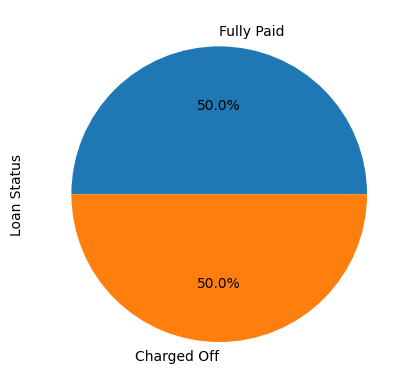

In [57]:
df_upsampled['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(df_upsampled['Loan Status'].value_counts())

<AxesSubplot: xlabel='Loan Status', ylabel='count'>

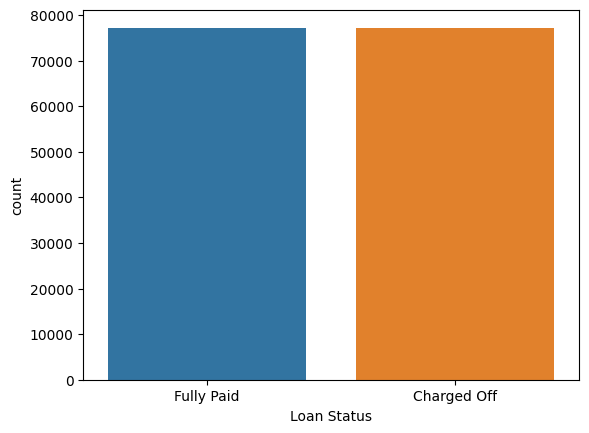

In [58]:
sns.countplot(x='Loan Status', data = df_upsampled)

# Feature Engineering

In [59]:
df_upsampled.select_dtypes("object").apply(lambda x: x.unique())

Loan Status                               [Fully Paid, Charged Off]
Term                                        [Short Term, Long Term]
Home Ownership        [Home Mortgage, Own Home, Rent, HaveMortgage]
Purpose           [Home Improvements, Debt Consolidation, Buy Ho...
dtype: object

In [60]:
df_upsampled["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'Take a Trip', 'Other',
       'Medical Bills', 'wedding', 'vacation', 'major_purchase',
       'small_business', 'Educational Expenses', 'moving',
       'renewable_energy'], dtype=object)

In [61]:
df_upsampled["Loan Status"] = df_upsampled["Loan Status"].replace({"Fully Paid" : 1, "Charged Off" : 0})

In [62]:
df_upsampled.head()

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,1,262328,Short Term,724.0,1174143.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,1,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,1,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,1,176220,Short Term,724.0,1174143.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [64]:
dff = df_upsampled.copy()

In [65]:
dff

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,1,262328,Short Term,724.0,1174143.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,1,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,1,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,1,176220,Short Term,724.0,1174143.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21843,21844,0,326480,Short Term,733.0,1691703.0,6.0,Rent,Debt Consolidation,12955.72,13.5,7,2,123728,406978.0,2.0,0.0
85695,85696,0,257532,Short Term,740.0,1056476.0,10.0,Rent,Debt Consolidation,12237.33,15.3,5,0,153387,315480.0,0.0,0.0
56945,56946,0,336314,Long Term,724.0,1174143.0,1.0,Rent,Debt Consolidation,5467.63,10.0,16,0,205694,401632.0,0.0,0.0
51482,51483,0,264396,Long Term,713.0,1560337.0,10.0,Home Mortgage,Debt Consolidation,29776.42,18.6,17,0,366947,643764.0,0.0,0.0


In [66]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154414 entries, 0 to 17374
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    154414 non-null  int64  
 1   Loan Status                154414 non-null  int64  
 2   Current Loan Amount        154414 non-null  int64  
 3   Term                       154414 non-null  object 
 4   Credit Score               154414 non-null  float64
 5   Annual Income              154414 non-null  float64
 6   Years in current job       154414 non-null  float64
 7   Home Ownership             154414 non-null  object 
 8   Purpose                    154414 non-null  object 
 9   Monthly Debt               154414 non-null  float64
 10  Years of Credit History    154414 non-null  float64
 11  Number of Open Accounts    154414 non-null  int64  
 12  Number of Credit Problems  154414 non-null  int64  
 13  Current Credit Balance     154

In [67]:
categorical_data=dff.select_dtypes(include="object")

In [68]:
categorical_data

,Term,Home Ownership,Purpose
0,Short Term,Home Mortgage,Home Improvements
1,Short Term,Home Mortgage,Debt Consolidation
2,Short Term,Own Home,Debt Consolidation
3,Long Term,Own Home,Debt Consolidation
4,Short Term,Rent,Debt Consolidation
...,...,...,...
21843,Short Term,Rent,Debt Consolidation
85695,Short Term,Rent,Debt Consolidation
56945,Long Term,Rent,Debt Consolidation
51482,Long Term,Home Mortgage,Debt Consolidation


In [69]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154414 entries, 0 to 17374
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Term            154414 non-null  object
 1   Home Ownership  154414 non-null  object
 2   Purpose         154414 non-null  object
dtypes: object(3)
memory usage: 4.7+ MB


In [70]:
column_names=categorical_data.columns
for i in column_names:
    print(dff[i].unique())

['Short Term' 'Long Term']
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'Take a Trip' 'Other' 'Medical Bills'
 'wedding' 'vacation' 'major_purchase' 'small_business'
 'Educational Expenses' 'moving' 'renewable_energy']


In [71]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

#categorical_data['Id']=label.fit_transform(categorical_data['Id'])
categorical_data['Loan ID']=dff['Loan ID']
categorical_data['Term']=label.fit_transform(categorical_data['Term'])
categorical_data['Home Ownership']=label.fit_transform(categorical_data['Home Ownership'])
categorical_data['Purpose']=label.fit_transform(categorical_data['Purpose'])

In [72]:
categorical_data

,Term,Home Ownership,Purpose,Loan ID
0,1,1,5,1
1,1,1,3,2
2,1,2,3,3
3,0,2,3,4
4,1,3,3,5
...,...,...,...,...
21843,1,3,3,21844
85695,1,3,3,85696
56945,0,3,3,56946
51482,0,1,3,51483


In [73]:
numeric_data=dff.select_dtypes(exclude="object")

In [74]:
numeric_data

,Loan ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,445412,709.0,1167493.0,8.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,1,262328,724.0,1174143.0,10.0,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,1,99999999,741.0,2231892.0,8.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,1,347666,721.0,806949.0,3.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,1,176220,724.0,1174143.0,5.0,20639.70,6.1,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21843,21844,0,326480,733.0,1691703.0,6.0,12955.72,13.5,7,2,123728,406978.0,2.0,0.0
85695,85696,0,257532,740.0,1056476.0,10.0,12237.33,15.3,5,0,153387,315480.0,0.0,0.0
56945,56946,0,336314,724.0,1174143.0,1.0,5467.63,10.0,16,0,205694,401632.0,0.0,0.0
51482,51483,0,264396,713.0,1560337.0,10.0,29776.42,18.6,17,0,366947,643764.0,0.0,0.0


In [75]:
result_data = pd.merge(categorical_data, numeric_data, how="left", on="Loan ID")

In [76]:
result_data

,Term,Home Ownership,Purpose,Loan ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,5,1,1,445412,709.0,1167493.0,8.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,1,1,3,2,1,262328,724.0,1174143.0,10.0,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,1,2,3,3,1,99999999,741.0,2231892.0,8.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,0,2,3,4,1,347666,721.0,806949.0,3.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,1,3,3,5,1,176220,724.0,1174143.0,5.0,20639.70,6.1,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418297,0,3,3,56946,0,336314,724.0,1174143.0,1.0,5467.63,10.0,16,0,205694,401632.0,0.0,0.0
418298,0,1,3,51483,0,264396,713.0,1560337.0,10.0,29776.42,18.6,17,0,366947,643764.0,0.0,0.0
418299,0,1,3,51483,0,264396,713.0,1560337.0,10.0,29776.42,18.6,17,0,366947,643764.0,0.0,0.0
418300,1,3,3,17375,0,164582,736.0,1364580.0,5.0,17625.92,5.8,7,0,384750,522302.0,0.0,0.0


In [77]:
result_df = result_data.drop_duplicates(subset=['Loan ID'])

In [78]:
result_df

,Term,Home Ownership,Purpose,Loan ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,5,1,1,445412,709.0,1167493.0,8.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,1,1,3,2,1,262328,724.0,1174143.0,10.0,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,1,2,3,3,1,99999999,741.0,2231892.0,8.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,0,2,3,4,1,347666,721.0,806949.0,3.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,1,3,3,5,1,176220,724.0,1174143.0,5.0,20639.70,6.1,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417638,1,1,5,10201,0,87516,750.0,491340.0,4.0,5936.93,30.3,10,0,494,284460.0,0.0,0.0
417693,0,1,5,68741,0,435028,696.0,911088.0,7.0,10523.15,23.4,11,0,187891,1163426.0,0.0,0.0
417808,1,1,3,92501,0,107580,724.0,1174143.0,10.0,30310.32,14.0,15,0,521588,706354.0,0.0,0.0
417813,1,1,5,48802,0,91212,712.0,937745.0,3.0,18129.80,7.7,8,0,176206,341176.0,0.0,0.0


# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable) Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

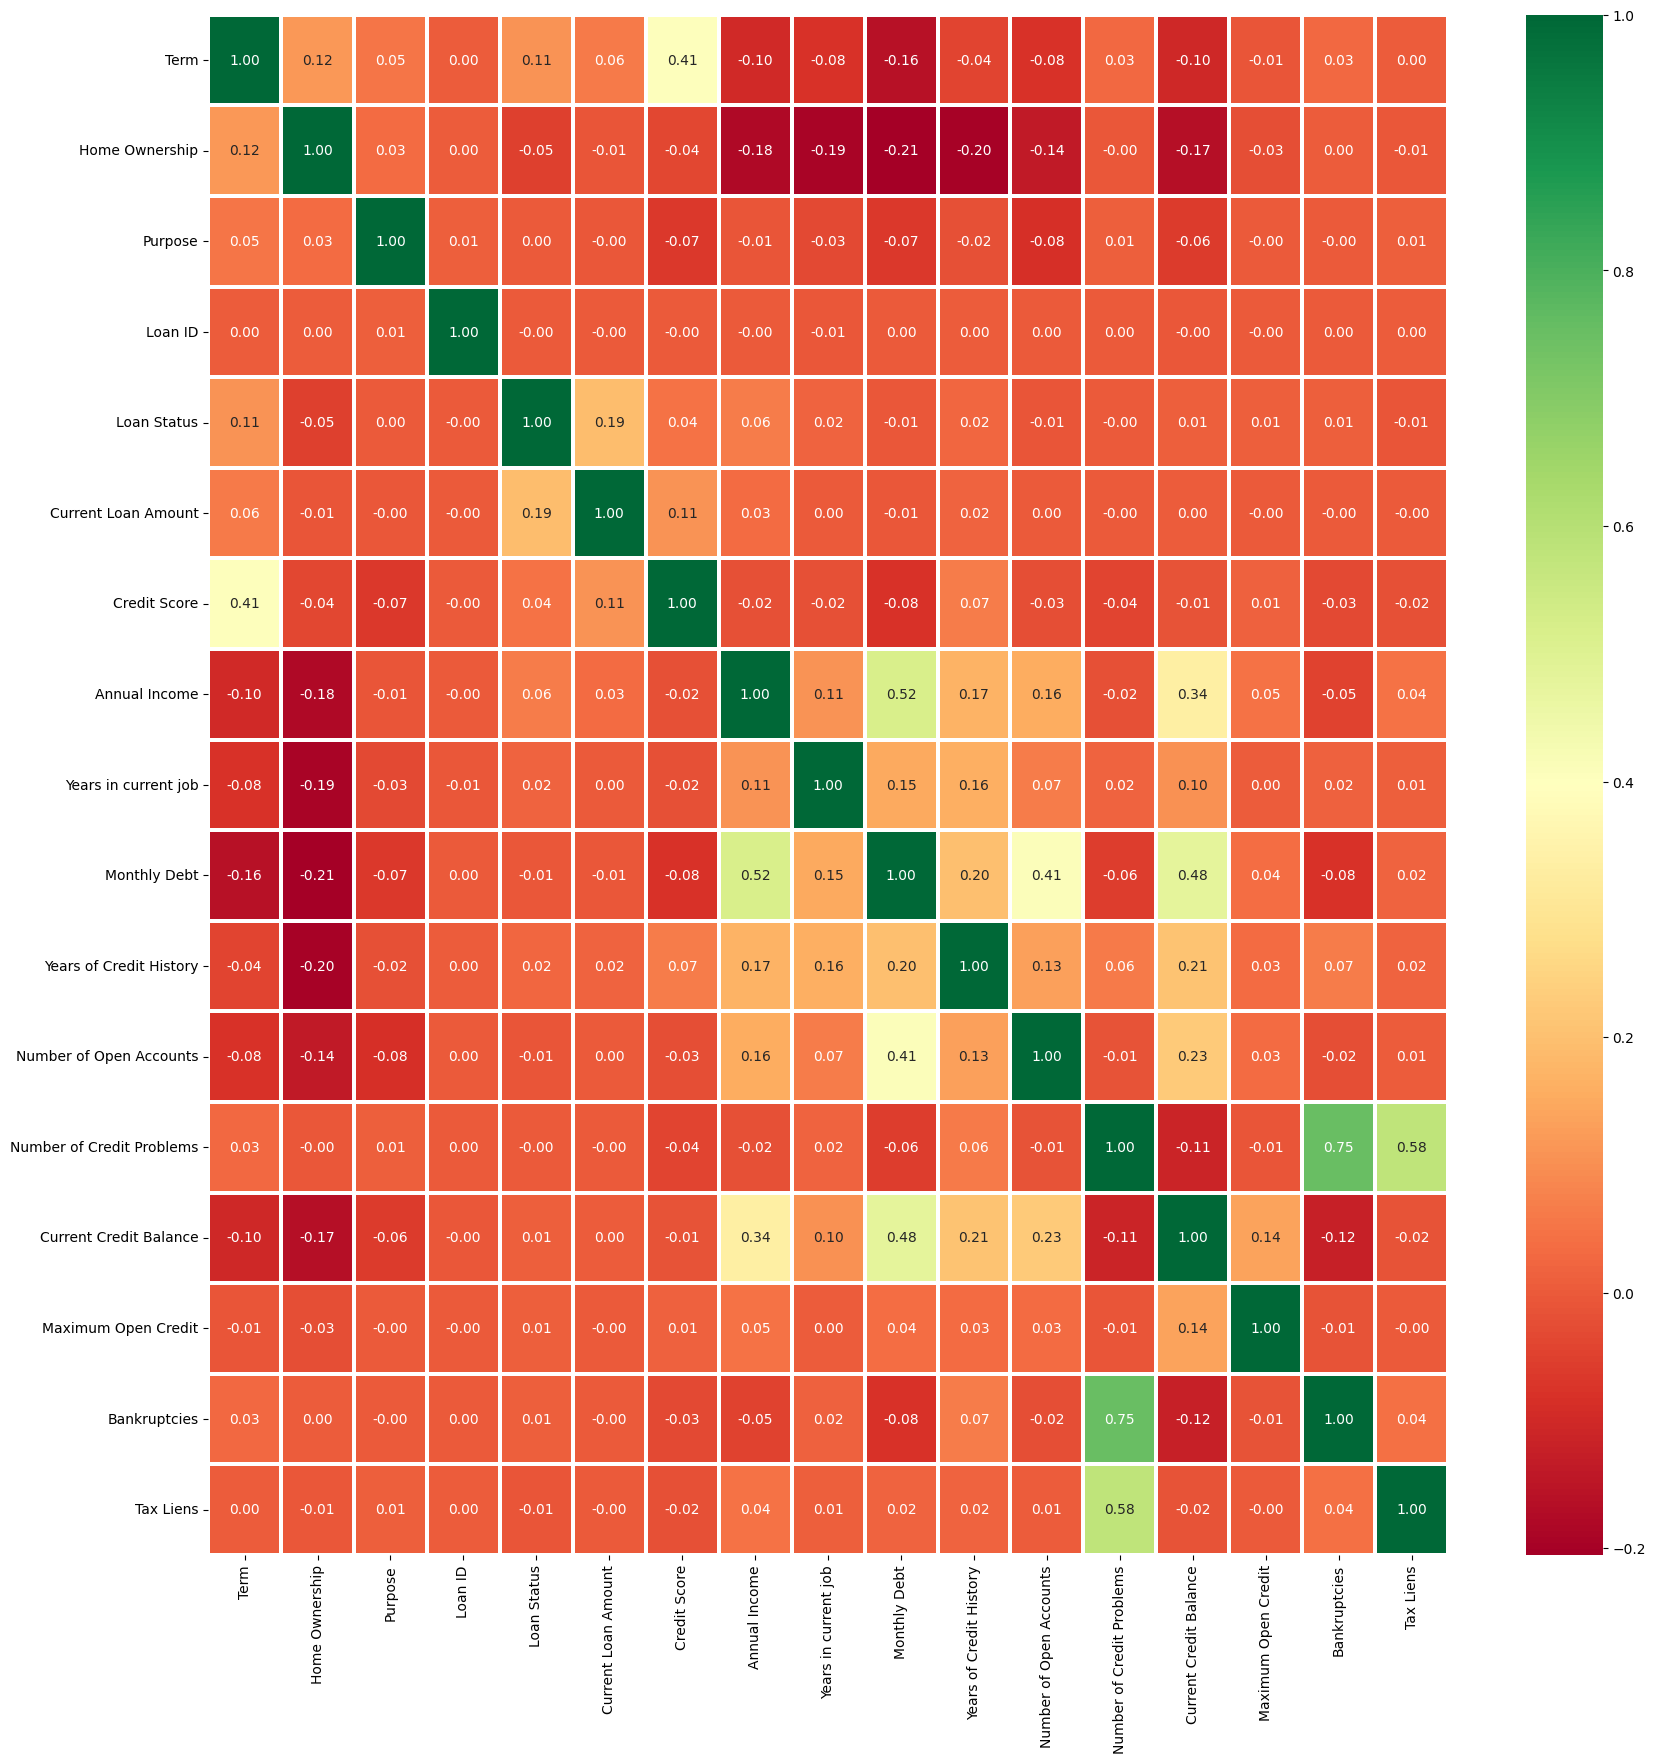

In [80]:
import seaborn as sns
X = result_df.iloc[:,0:18]  #independent columns
y = result_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = result_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result_df[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=1.5, fmt='.2f')

In [81]:
result_df.corr()

,Term,Home Ownership,Purpose,Loan ID,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Term,1.000000,0.115896,0.052819,0.004550,0.109331,0.058689,0.405051,-0.097140,-0.081591,-0.158342,-0.042027,-0.082261,0.026699,-0.104357,-0.008590,0.029205,0.003516
Home Ownership,0.115896,1.000000,0.030489,0.002660,-0.053182,-0.011330,-0.035961,-0.180986,-0.193499,-0.205269,-0.197705,-0.136351,-0.003324,-0.165753,-0.025713,0.002740,-0.005176
Purpose,0.052819,0.030489,1.000000,0.006677,0.000107,-0.003264,-0.067973,-0.007704,-0.033255,-0.068704,-0.020739,-0.084119,0.006886,-0.059844,-0.000511,-0.001478,0.007724
Loan ID,0.004550,0.002660,0.006677,1.000000,-0.001520,-0.001520,-0.000843,-0.000257,-0.005672,0.001375,0.004312,0.001474,0.001329,-0.004585,-0.001947,0.001139,0.003057
Loan Status,0.109331,-0.053182,0.000107,-0.001520,1.000000,0.192277,0.044466,0.064785,0.019190,-0.007377,0.023275,-0.011277,-0.001416,0.010088,0.008117,0.006778,-0.009411
Current Loan Amount,0.058689,-0.011330,-0.003264,-0.001520,0.192277,1.000000,0.106787,0.033024,0.001283,-0.006470,0.019228,0.001863,-0.002667,0.004109,-0.001167,-0.000592,-0.001859
Credit Score,0.405051,-0.035961,-0.067973,-0.000843,0.044466,0.106787,1.000000,-0.017051,-0.017041,-0.078691,0.067721,-0.025385,-0.044252,-0.014011,0.013106,-0.033145,-0.018937
Annual Income,-0.097140,-0.180986,-0.007704,-0.000257,0.064785,0.033024,-0.017051,1.000000,0.107660,0.517242,0.170387,0.155562,-0.017379,0.335021,0.045338,-0.049889,0.044326
Years in current job,-0.081591,-0.193499,-0.033255,-0.005672,0.019190,0.001283,-0.017041,0.107660,1.000000,0.150771,0.159646,0.067039,0.018055,0.101220,0.002814,0.015209,0.009076
Monthly Debt,-0.158342,-0.205269,-0.068704,0.001375,-0.007377,-0.006470,-0.078691,0.517242,0.150771,1.000000,0.199213,0.411103,-0.056545,0.481288,0.039447,-0.079185,0.019466


In [82]:
# plt.figure(figsize=(10,8))

# # corr
# data_corr = result_df.corr()

# # mask
# mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# # adjust mask and df
# mask = mask[1:, :-1]
# corr = data_corr.iloc[1:,:-1].copy()

# sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
# plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# # plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

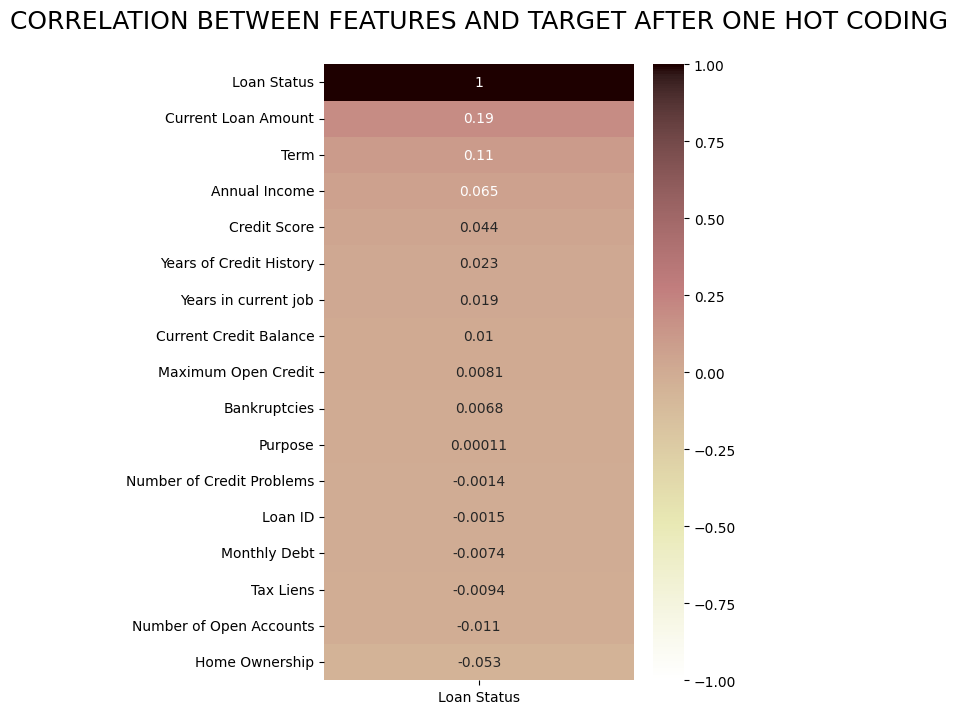

In [83]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(result_df.corr()[
    ['Loan Status']].sort_values(by='Loan Status',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET AFTER ONE HOT CODING\n', loc='center', fontsize=18);

# Visualize data

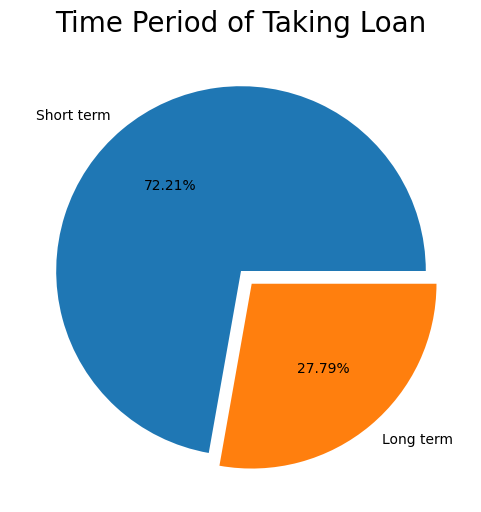

In [84]:
plt.figure(figsize=(6,6))
plt.pie(x=data['Term'].value_counts(),labels=['Short term','Long term'],explode=[0,0.09],autopct='%.2f%%')
plt.title('Time Period of Taking Loan',fontdict={'fontsize':20})
plt.show()

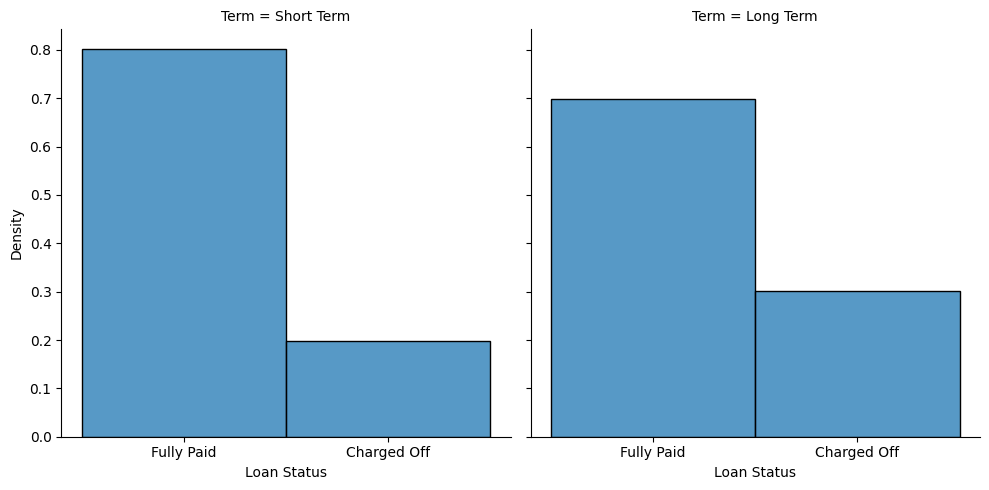

In [85]:
sns.displot(df,x="Loan Status", col="Term", stat="density",common_norm=False)

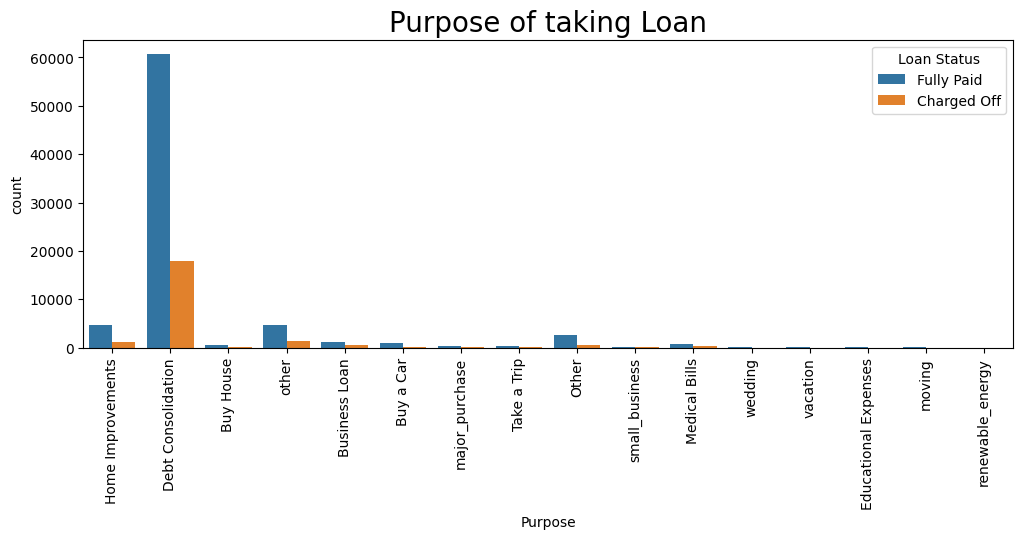

In [86]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=data,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

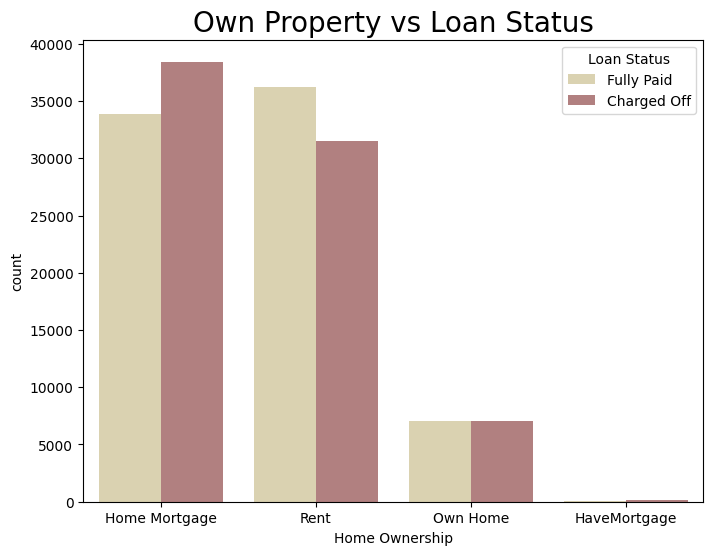

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(x='Home Ownership',data=dff ,order = dff['Home Ownership'].value_counts().index
              ,hue='Loan Status',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan Status", loc="upper right", labels=["Fully Paid","Charged Off"]);

<AxesSubplot: xlabel='Tax Liens', ylabel='Count'>

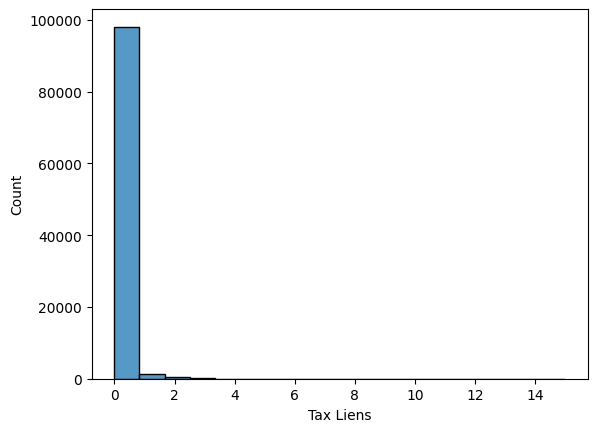

In [88]:
sns.histplot(x= 'Tax Liens',data =data)

<AxesSubplot: xlabel='Bankruptcies', ylabel='Count'>

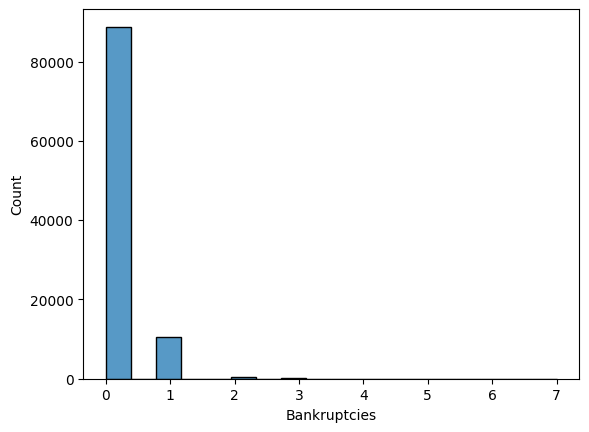

In [89]:
sns.histplot(x= 'Bankruptcies',data =data)

<AxesSubplot: xlabel='Annual Income', ylabel='Count'>

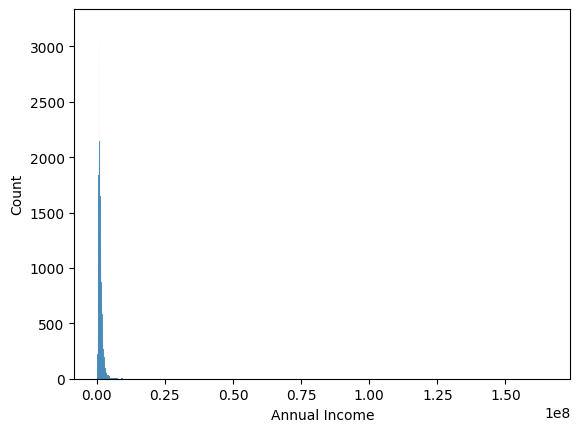

In [90]:
sns.histplot(x= 'Annual Income',data =data)

<AxesSubplot: xlabel='Credit Score', ylabel='Count'>

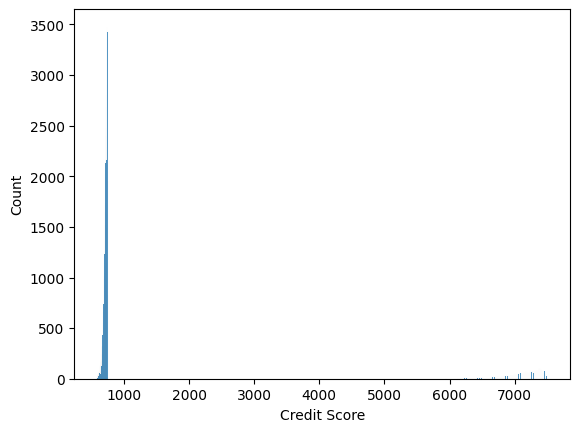

In [91]:
sns.histplot(x= 'Credit Score',data =data)

In [92]:
df_upsampled.head()

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,2,1,262328,Short Term,724.0,1174143.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,3,1,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,4,1,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,5,1,176220,Short Term,724.0,1174143.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [93]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [94]:
X = df_upsampled.drop("Loan Status", axis = 1)
y = df_upsampled["Loan Status"]

# Algorithms and techniques

The prediction process is as follows: 1) The data set with all machine readable information is split into a training and a testing set. 20% of the original datapoints are left out for testing purposes to validate the final model. In this step the stratify option is being used in order to keep a similar distribution of label data in testing and training set. 2) The training features set will be split into independent (predictors) and dependent (label) variables. The predictors will be used to predict the label. 3) A random state will be set which will help with the reproducibility of the prediction process. 4) In order to avoid overfitting k-fold cross-validation with k = 5 is performed. This means the training set is split in five separate buckets. Four of these buckets are used to train and the left out bucket is used for testing. CV performs this k-times. The average score will give a better indicator on how the model will perform on the testing set or in a real-life application. 5) Base Prediction: Prediction takes place with basic settings. 6) In order to find the best possible setup for the supervised learning algorithms grid search is performed on all algorithms. 7) Testing: All trained models are being used on the 20% hold-out data. The highest prediction score in this process is being recorded.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [96]:
X_train.shape

(123531, 16)

In [97]:
X_test.shape

(30883, 16)

In [98]:
X_train.head()

,Loan ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
40844,40845,99999999,Short Term,741.0,462707.0,2.0,Home Mortgage,Medical Bills,4627.07,21.4,3,0,0,0.0,0.0,0.0
17248,17249,263362,Long Term,663.0,1516352.0,10.0,Own Home,Debt Consolidation,23124.33,26.0,17,0,534603,723998.0,0.0,0.0
45557,45558,68420,Short Term,724.0,1174143.0,10.0,Own Home,Debt Consolidation,19396.34,13.9,8,0,147231,469656.0,0.0,0.0
75386,75387,294514,Long Term,724.0,1174143.0,10.0,Home Mortgage,Debt Consolidation,19983.44,16.2,10,0,56696,261514.0,0.0,0.0
1826,1827,44660,Short Term,715.0,867749.0,1.0,Rent,other,7672.39,11.0,5,0,16986,22330.0,0.0,0.0


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [100]:
def map_func(x):
    return x.str.extract('(\d+)').astype(float)


class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        X_scaled = X.copy()
        X_scaled[self.columns] = map_func(X_scaled[self.columns])
        return X_scaled
    
    def fit(self, X, y=None, **fit_params):
        return self    
  

In [101]:
def minmax(y):
    return MinMaxScaler().fit_transform(y)


class Minmaxscaler():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X_scaled, **transform_params):
        X_scaled[self.columns] = minmax(X_scaled[self.columns])
        return X_scaled
    
    def fit(self, X_scaled, y=None, **fit_params):
        return self
        

In [102]:
def label(z):
    return z.apply(lambda x: LabelEncoder().fit_transform(x))


class Labelencoder():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X_scaled, **transform_params):
        X_scaled[self.columns] = label(X_scaled[self.columns])
        return X_scaled
    
    def fit(self, X_scaled, y=None, **fit_params):
        return self  
        

In [103]:
# Using Pipeline to get scaling and modelling
from sklearn.preprocessing import OneHotEncoder

num_features = list(X_train.select_dtypes(exclude="object"))
num_transformer = Pipeline([("scaler", MinMaxScaler())])

cat_features = list(X_train.select_dtypes(include="object"))
cat_transformer = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessing = ColumnTransformer([("first", num_transformer, num_features),
          ("second", cat_transformer, cat_features)
          ])

In [104]:
def model_test(model_name): # test model performance for default parameters
    pipeline = Pipeline([("preprocessing", preprocessing),
               ("model", model_name)])
    
    global model_fitted
    model_fitted = pipeline.fit(X_train, y_train)
    train_pred = model_fitted.predict(X_train)
    test_pred = model_fitted.predict(X_test)
    print("Train_set Accuracy: %.2f" % accuracy_score(y_train, train_pred))
    print("-----------------------------------------")
    print("Test_set Accuracy: %.2f" % accuracy_score(y_test, test_pred))
    print("-----------------------------------------")
    print("Test_set Confusion Matrix: \n", confusion_matrix(y_test, test_pred))
    print("-----------------------------------------")
    print("Test_report: \n", classification_report(y_test, test_pred))

In [105]:
def parameter_search(model_name,model_params): # searching best parameter of models
    pipeline = Pipeline([("preprocessing", preprocessing),
               ("model", model_name)])
    
    best_params = GridSearchCV(pipeline, model_params, 
                               cv = 10, scoring = "accuracy").fit(X_train, y_train).best_params_
    return best_params

In [106]:
def optimization(model_name, params): # model test and scoring metrics with hyperparameters   
    pipeline = Pipeline([("preprocessing", preprocessing),
               ("model", model_name)])
    global model_tuned
    model_tuned = pipeline.set_params(**params).fit(X_train, y_train)
    train_pred = model_tuned.predict(X_train)
    test_pred = model_tuned.predict(X_test)
    print("Tuned Model Evaluating")
    print("=========================================")
    print("=========================================\n")
    print("Train_set Accuracy: %.2f" % accuracy_score(y_train, train_pred))
    print("-----------------------------------------")
    print("Test_set Accuracy: %.2f" % accuracy_score(y_test, test_pred))
    print("-----------------------------------------")
    print("Test_set Confusion Matrix: \n", confusion_matrix(y_test, test_pred))
    print("-----------------------------------------")
    print("Test_report: \n", classification_report(y_test, test_pred))
    print("-----------------------------------------")
    print("Test_curve: \n")
    
    model_roc_auc = roc_auc_score(y_test, test_pred)

    fpr, tpr, thresholds = roc_curve(y_test, model_tuned.predict_proba(X_test)[:,1])
    plt.figure(figsize = (7,5))
    plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % model_roc_auc)
    plt.plot([0, 1], [0, 1],"r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive", fontsize = 12, fontweight = "bold")
    plt.ylabel("True Positive", fontsize = 12, fontweight = "bold")
    plt.title("Tuned Model ROC Curve", fontsize = 11, fontweight = "bold", color = "brown")
    plt.show()
    
    return model_tuned

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model_test(LogisticRegression(max_iter = 1000))

Train_set Accuracy: 0.61
-----------------------------------------
Test_set Accuracy: 0.61
-----------------------------------------
Test_set Confusion Matrix: 
 [[11264  4227]
 [ 7834  7558]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.59      0.73      0.65     15491
           1       0.64      0.49      0.56     15392

    accuracy                           0.61     30883
   macro avg       0.62      0.61      0.60     30883
weighted avg       0.62      0.61      0.60     30883



In [109]:
log_params = {"model__C" : [0.1,1,5],
             "model__solver" : ["lbfgs", "liblinear", "sag"]}

In [110]:
#log_best_params = parameter_search(LogisticRegression(max_iter = 1000),log_params)
#log_best_params
log_best_params = {'model__C': 1, 'model__solver': 'lbfgs'}

Tuned Model Evaluating

Train_set Accuracy: 0.61
-----------------------------------------
Test_set Accuracy: 0.61
-----------------------------------------
Test_set Confusion Matrix: 
 [[11252  4239]
 [ 7818  7574]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.59      0.73      0.65     15491
           1       0.64      0.49      0.56     15392

    accuracy                           0.61     30883
   macro avg       0.62      0.61      0.60     30883
weighted avg       0.62      0.61      0.60     30883

-----------------------------------------
Test_curve: 



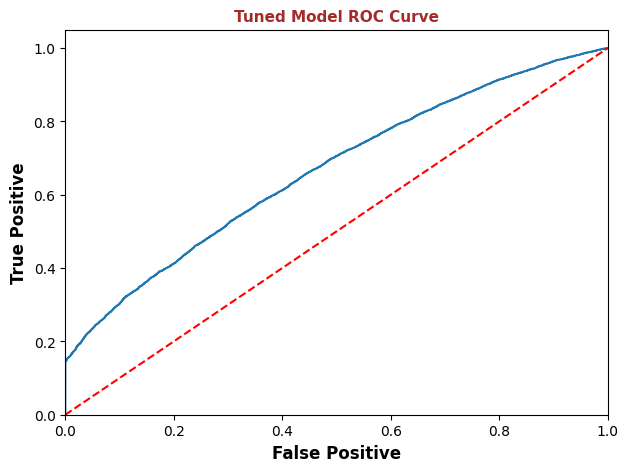

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('first',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Loan ID',
                                                   'Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Years in current job',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open Credit',
                                                   'Bankruptcies',
                                                   'Tax Liens']),
                                                 ('second',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Term', 'Home Ownership',
                                                   'Purpose'])])),
                ('model', LogisticRegression(C=1))])

In [111]:
log_tuned = optimization(LogisticRegression(),log_best_params)
log_tuned

# KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
model_test(KNeighborsClassifier())

Train_set Accuracy: 0.82
-----------------------------------------
Test_set Accuracy: 0.71
-----------------------------------------
Test_set Confusion Matrix: 
 [[12721  2770]
 [ 6199  9193]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74     15491
           1       0.77      0.60      0.67     15392

    accuracy                           0.71     30883
   macro avg       0.72      0.71      0.71     30883
weighted avg       0.72      0.71      0.71     30883



In [114]:
knn_params = {"model__n_neighbors" : [5,10,15,20]}

In [115]:
#knn_best_params = parameter_search(KNeighborsClassifier(), knn_params)
#knn_best_params
knn_best_params = {'model__n_neighbors': 5}

Tuned Model Evaluating

Train_set Accuracy: 0.82
-----------------------------------------
Test_set Accuracy: 0.71
-----------------------------------------
Test_set Confusion Matrix: 
 [[12721  2770]
 [ 6199  9193]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74     15491
           1       0.77      0.60      0.67     15392

    accuracy                           0.71     30883
   macro avg       0.72      0.71      0.71     30883
weighted avg       0.72      0.71      0.71     30883

-----------------------------------------
Test_curve: 



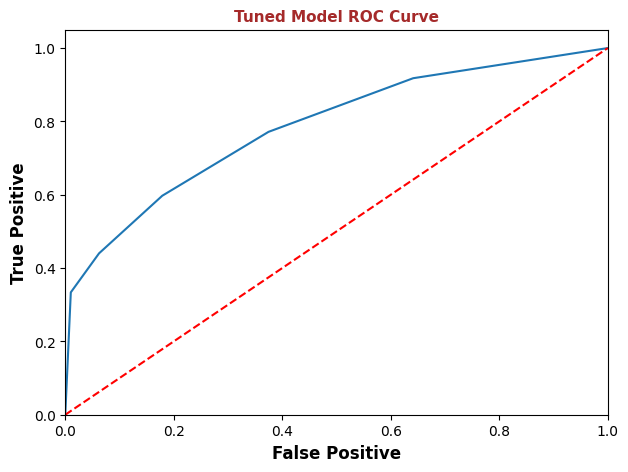

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('first',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Loan ID',
                                                   'Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Years in current job',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open Credit',
                                                   'Bankruptcies',
                                                   'Tax Liens']),
                                                 ('second',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Term', 'Home Ownership',
                                                   'Purpose'])])),
                ('model', KNeighborsClassifier())])

In [116]:
knn_tuned = optimization(KNeighborsClassifier(), knn_best_params)
knn_tuned

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
model_test(RandomForestClassifier())

Train_set Accuracy: 1.00
-----------------------------------------
Test_set Accuracy: 0.95
-----------------------------------------
Test_set Confusion Matrix: 
 [[14770   721]
 [  881 14511]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     15491
           1       0.95      0.94      0.95     15392

    accuracy                           0.95     30883
   macro avg       0.95      0.95      0.95     30883
weighted avg       0.95      0.95      0.95     30883



In [119]:
rf_params = {"model__n_estimators" : [100,500,750],
            "model__max_depth" : [50,100]}

In [120]:
#rf_best_params = parameter_search(RandomForestClassifier(), rf_params)
#rf_best_params
rf_best_params = {'model__max_depth': 100, 'model__n_estimators': 750}

Tuned Model Evaluating

Train_set Accuracy: 1.00
-----------------------------------------
Test_set Accuracy: 0.95
-----------------------------------------
Test_set Confusion Matrix: 
 [[14757   734]
 [  749 14643]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     15491
           1       0.95      0.95      0.95     15392

    accuracy                           0.95     30883
   macro avg       0.95      0.95      0.95     30883
weighted avg       0.95      0.95      0.95     30883

-----------------------------------------
Test_curve: 



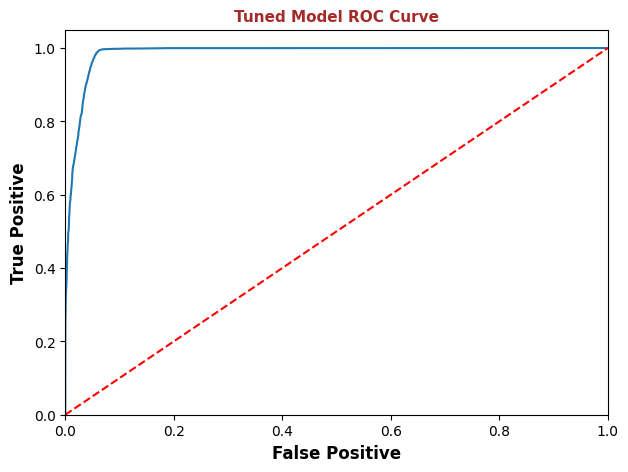

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('first',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Loan ID',
                                                   'Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Years in current job',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open Credit',
                                                   'Bankruptcies',
                                                   'Tax Liens']),
                                                 ('second',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Term', 'Home Ownership',
                                                   'Purpose'])])),
                ('model',
                 RandomForestClassifier(max_depth=100, n_estimators=750))])

In [121]:
rf_tuned = optimization(RandomForestClassifier(), rf_best_params)
rf_tuned

# XGBoost Classifier

In [122]:
from xgboost import XGBClassifier

In [123]:
model_test(XGBClassifier())

Train_set Accuracy: 0.77
-----------------------------------------
Test_set Accuracy: 0.74
-----------------------------------------
Test_set Confusion Matrix: 
 [[11641  3850]
 [ 4111 11281]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75     15491
           1       0.75      0.73      0.74     15392

    accuracy                           0.74     30883
   macro avg       0.74      0.74      0.74     30883
weighted avg       0.74      0.74      0.74     30883



In [124]:
xgb_params = {"model__n_estimators": [100, 500],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.1,0.01]}

In [125]:
#xgb_best_params = parameter_search(XGBClassifier(), xgb_params)
#xgb_best_params
xgb_best_params = {'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 500,
 'model__subsample': 0.6}

Tuned Model Evaluating

Train_set Accuracy: 0.79
-----------------------------------------
Test_set Accuracy: 0.75
-----------------------------------------
Test_set Confusion Matrix: 
 [[11876  3615]
 [ 3953 11439]]
-----------------------------------------
Test_report: 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76     15491
           1       0.76      0.74      0.75     15392

    accuracy                           0.75     30883
   macro avg       0.76      0.75      0.75     30883
weighted avg       0.76      0.75      0.75     30883

-----------------------------------------
Test_curve: 



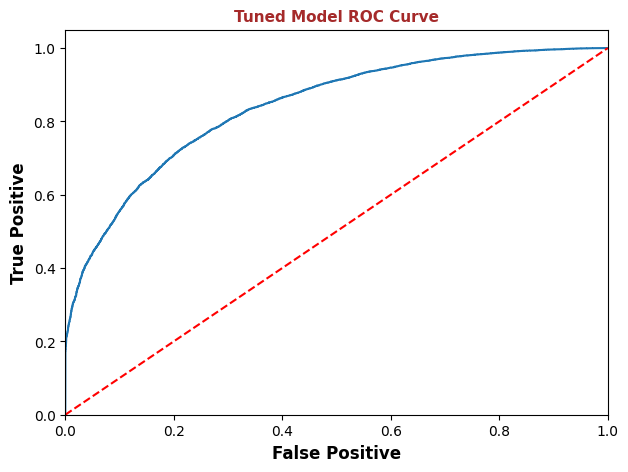

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('first',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Loan ID',
                                                   'Current Loan Amount',
                                                   'Credit Score',
                                                   'Annual Income',
                                                   'Years in current job',
                                                   'Monthly Debt',
                                                   'Years of Credit History',
                                                   'Number of Open Accounts',
                                                   'Number of Credit Problems',
                                                   'Current Credit Balance',
                                                   'Maximum Open Credit',
                                                   'Bankruptcies',
                                                   'Tax Liens'...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [126]:
xgb_tuned = optimization(XGBClassifier(), xgb_best_params)
xgb_tuned

In [127]:
# model save

# from joblib import dump
# dump(rf_tuned, "rf_bank_model.pkl")

['rf_bank_modell.pkl']